In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re


In [60]:
anime = pd.read_csv("anime.csv")
anime.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [61]:
anime.isnull().sum()


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [62]:
anime[anime['episodes']=='Unknown'].head(3)


,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578


In [63]:
anime.loc[(anime["genre"]=="Hentai") & (anime["episodes"]=="Unknown"),"episodes"] = "1"
anime.loc[(anime["type"]=="OVA") & (anime["episodes"]=="Unknown"),"episodes"] = "1"

anime.loc[(anime["type"] == "Movie") & (anime["episodes"] == "Unknown")] = "1"

In [64]:
known_animes = {"Naruto Shippuuden":500, "One Piece":784,"Detective Conan":854, "Dragon Ball Super":86,
                "Crayon Shin chan":942, "Yu Gi Oh Arc V":148,"Shingeki no Kyojin Season 2":25,
                "Boku no Hero Academia 2nd Season":25,"Little Witch Academia TV":25}

In [65]:
for i,j in known_animes.items():    
    anime.loc[anime["name"]==i,"episodes"] = j
anime["episodes"] = anime["episodes"].map(lambda x:np.nan if x=="Unknown" else x)
anime["episodes"].fillna(anime["episodes"].median(),inplace = True)
anime["episodes"].fillna(anime["episodes"].median(),inplace = True)

anime["rating"] = anime["rating"].astype(float)
anime["rating"].fillna(anime["rating"].median(),inplace = True)
anime["members"] = anime["members"].astype(float)
anime_features = pd.concat([anime["genre"].str.get_dummies(sep=","),
                            pd.get_dummies(anime[["type"]]),
                            anime[["rating"]],anime[["members"]],anime["episodes"]],axis=1)
anime["name"] = anime["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))
anime_features.head()

In [71]:
anime_features.columns


Index([' Adventure', ' Cars', ' Comedy', ' Dementia', ' Demons', ' Drama',
       ' Ecchi', ' Fantasy', ' Game', ' Harem', ' Hentai', ' Historical',
       ' Horror', ' Josei', ' Kids', ' Magic', ' Martial Arts', ' Mecha',
       ' Military', ' Music', ' Mystery', ' Parody', ' Police',
       ' Psychological', ' Romance', ' Samurai', ' School', ' Sci-Fi',
       ' Seinen', ' Shoujo', ' Shoujo Ai', ' Shounen', ' Shounen Ai',
       ' Slice of Life', ' Space', ' Sports', ' Super Power', ' Supernatural',
       ' Thriller', ' Vampire', ' Yaoi', ' Yuri', '1', 'Action', 'Adventure',
       'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
       'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids',
       'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery',
       'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School',
       'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Slice of Life', 'Space',
       'Sports', 'Super Power', 'Supernat

In [72]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
anime_features = min_max_scaler.fit_transform(anime_features)
np.round(anime_features,2)


array([[0.  , 0.  , 0.  , ..., 0.93, 0.2 , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.92, 0.78, 0.03],
       [0.  , 0.  , 1.  , ..., 0.92, 0.11, 0.03],
       ...,
       [0.  , 0.  , 0.  , ..., 0.43, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.44, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.5 , 0.  , 0.  ]])

In [73]:
from sklearn.neighbors import NearestNeighbors


In [74]:
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(anime_features)

In [75]:
distances, indices = nbrs.kneighbors(anime_features)


In [76]:
def get_index_from_name(name):
    return anime[anime["name"]==name].index.tolist()[0]

In [77]:
all_anime_names = list(anime.name.values)


In [78]:
def get_id_from_partial_name(partial):
    for name in all_anime_names:
        if partial in name:
            print(name,all_anime_names.index(name))


In [79]:
def print_similar_animes(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(anime.ix[id]["name"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(anime.ix[id]["name"])


In [80]:
print_similar_animes(query="Naruto")


Naruto Shippuuden
Katekyo Hitman Reborn 
Bleach
Dragon Ball Z
Boku no Hero Academia


/home/josu/AprendizadoMaquina/estudo/MachineLearning/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [81]:
print_similar_animes("Noragami")


Noragami Aragoto
JoJo no Kimyou na Bouken TV 
JoJo no Kimyou na Bouken Stardust Crusaders
JoJo no Kimyou na Bouken Stardust Crusaders 2nd Season
Yumekui Merry


In [82]:
print_similar_animes("Mushishi")


Mushishi Zoku Shou
Mushishi Zoku Shou 2nd Season
Mushishi Special Hihamukage
Mushishi Zoku Shou Odoro no Michi
Mushishi Zoku Shou Suzu no Shizuku


In [83]:
print_similar_animes("Gintama")


Gintama 039 
Gintama 
Gintama 039 Enchousen
Gintama 2017 
Gintama Movie Kanketsu hen Yorozuya yo Eien Nare


Text(0,0.5,'Inércia')

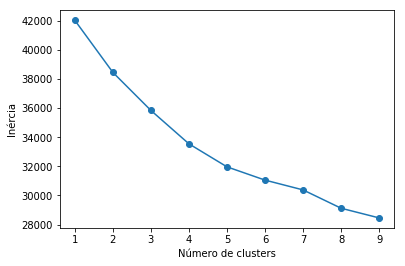

In [86]:
from sklearn.cluster import KMeans
inertias = []
ks = range(1, 10)
for i in ks:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(anime_features)
    inertias.append(kmeans.inertia_)
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')

In [90]:

kmeans = KMeans(n_clusters=9)
labels = kmeans.fit_predict(anime_features)

cluster_class = pd.DataFrame({'cluster': labels})
ct = pd.crosstab(cluster_class['cluster'],labels)
print(ct)

col_0       0     1     2     3     4     5    6    7     8
cluster                                                    
0        1185     0     0     0     0     0    0    0     0
1           0  1848     0     0     0     0    0    0     0
2           0     0  2484     0     0     0    0    0     0
3           0     0     0  1546     0     0    0    0     0
4           0     0     0     0  1496     0    0    0     0
5           0     0     0     0     0  1064    0    0     0
6           0     0     0     0     0     0  769    0     0
7           0     0     0     0     0     0    0  511     0
8           0     0     0     0     0     0    0    0  1391


In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
def closest_points(number_points, list_points):

    dlist = []
    for i in range(number_points - 1):
        pt = list_points.pop(0)
        x = pt[0]
        y = pt[1]

        for q in range(len(list_points)):
            x_length = x - list_points[q][0]
            y_length = y - list_points[q][1]
            distance = math.sqrt((x_length ** 2) + (y_length ** 2))
            dlist.append([distance, i + 1, q + 2 + i])

    for i, d in enumerate(dlist):
        print("Ponto {} para {} = {}".format(d[1], d[2], d[0]))

    dlist.sort()

    message = "\nPontos mais proximos sao {} e {} \nDistancia entre eles = {}"
    print( message.format(dlist[0][1], dlist[0][2], dlist[0][0]))

In [12]:
def generate_points(number_points):

    list_points = []
    fig, ax = plt.subplots()
    
    le = 'Point '
    for i in range(number_points):
        x = round(random.uniform(0, 100), 2)
        y = round(random.uniform(0, 100), 2)

        point = (x, y)
        list_points.append(point)
        ax.scatter(x, y)
        string = str(i+1)
        ax.annotate(string, (x, y), xytext=(-5, 5), textcoords='offset points')    
    
    ax.grid(True)

    for i, pt in enumerate(list_points):
        print( "Ponto {} - {}".format(i + 1, pt))
    print("")
    closest_points(number_points, list_points)

Ponto 1 - (52.71, 36.98)
Ponto 2 - (80.91, 35.47)
Ponto 3 - (1.92, 7.9)
Ponto 4 - (3.0, 18.7)
Ponto 5 - (73.8, 92.9)
Ponto 6 - (45.05, 27.0)
Ponto 7 - (16.06, 65.21)

Ponto 1 para 2 = 28.240398368295015
Ponto 1 para 3 = 58.52581054543371
Ponto 1 para 4 = 52.964540024435216
Ponto 1 para 5 = 59.76482661231438
Ponto 1 para 6 = 12.580778990189758
Ponto 1 para 7 = 46.26181362635927
Ponto 2 para 3 = 83.66316393730277
Ponto 2 para 4 = 79.69442264048344
Ponto 2 para 5 = 57.86844563317733
Ponto 2 para 6 = 36.846716271602816
Ponto 2 para 7 = 71.3441665449951
Ponto 3 para 4 = 10.85386567081056
Ponto 3 para 5 = 111.31816743011896
Ponto 3 para 6 = 47.16997880008003
Ponto 3 para 7 = 59.02860069491737
Ponto 4 para 5 = 102.55866613797197
Ponto 4 para 6 = 42.861317058625254
Ponto 4 para 7 = 48.30883666576953
Ponto 5 para 6 = 71.89834838158663
Ponto 5 para 7 = 64.0362686295821
Ponto 6 para 7 = 47.96273761994826

Pontos mais proximos sao 3 e 4 
Distancia entre eles = 10.85386567081056


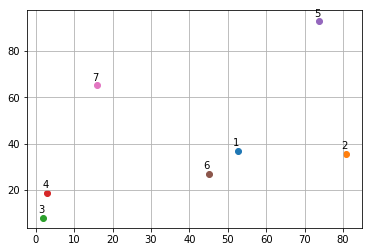

In [13]:
generate_points(7)